<a href="https://colab.research.google.com/github/VR952004/DataAnalysisProjects/blob/main/StudentPerformancePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/csv files/Student_Performance.csv")

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

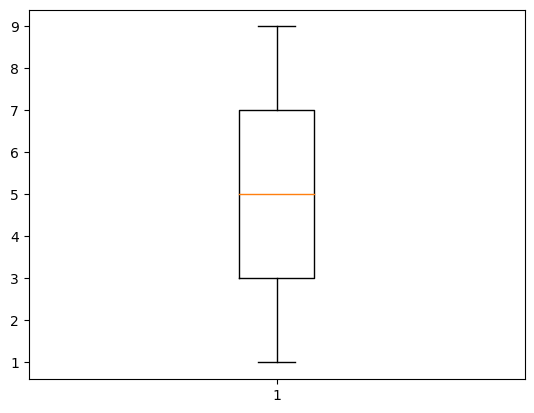

In [ ]:
plt.boxplot(df['Hours Studied'])
plt.show()

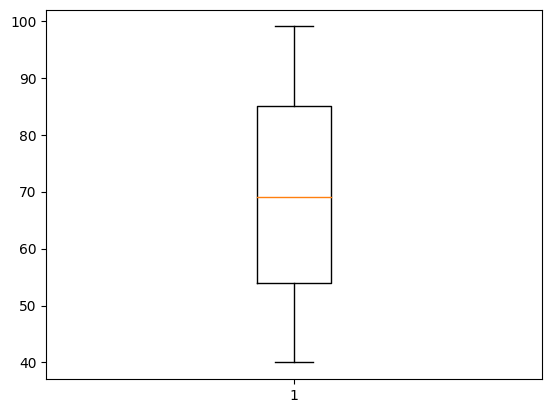

In [ ]:
plt.boxplot(df['Previous Scores'])
plt.show()

[]

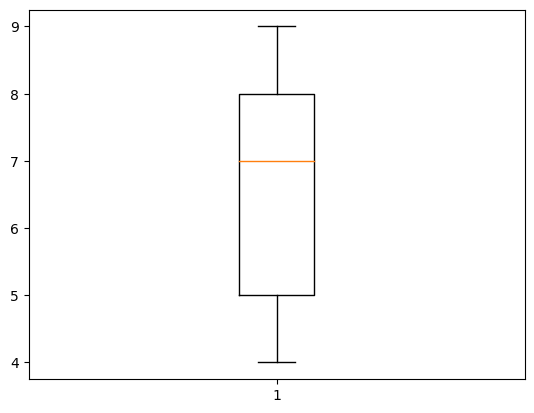

In [ ]:
plt.boxplot(df['Sleep Hours'])
plt.plot()

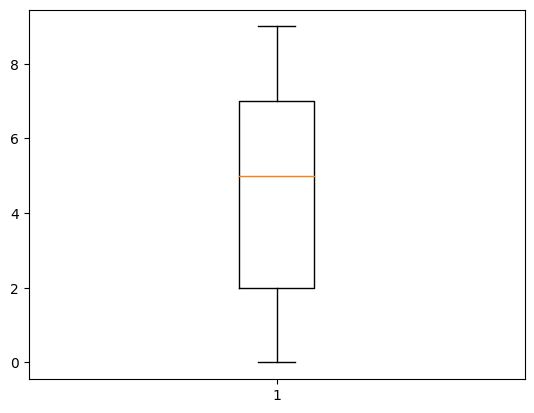

In [ ]:
plt.boxplot(df['Sample Question Papers Practiced'])
plt.show()

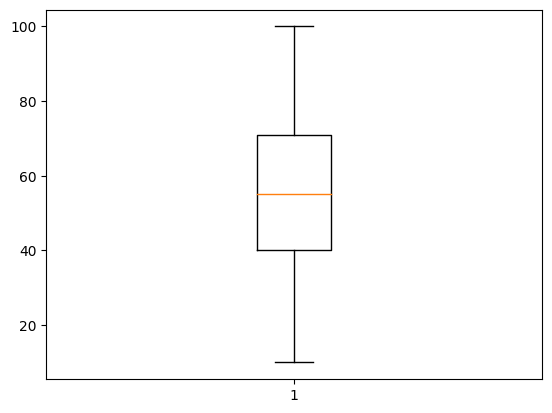

In [ ]:
plt.boxplot(df['Performance Index'])
plt.show()

The data already seems to be clean since there are no null values or outliers that can disrupt the accuracy of the predictions made by the model.

In [ ]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Label Encoding the Extracurricular Activity column
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train=df.sample(frac=0.8,random_state=0)  #frac=0.8 means 80% of the data will be set as training, random_state=0 means that the rows will not be selected at random.
test=df.drop(train.index)   #the test dataset is the df-training so we drop the rows from df which have the indices from training.

In [ ]:
train_y=train['Performance Index']
test_y=test['Performance Index']

In [ ]:
train_x=train.pop("Performance Index")
test_x=test.pop('Performance Index')

In [ ]:
model=keras.Sequential([
    layers.Dense(6,activation='relu'),

    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(1)
])

In [ ]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),metrics=['mae','mse'])

We must understand that we will not make use of the accuracy metric, instead we will use the metrics mean absolute error(mae) and mean squared error(mse), over the successive we can observe that the loss as well as these error metrics are reducing this shows that our neural network is improving its power to accurately predict the performance index.

In [ ]:
trained_model=model.fit(train_x,train_y,batch_size=30,epochs=200,verbose=2,validation_split=0.2)
#validation_split is used to validate the model while training itself,0.2 means 20% of training data will go into validation

Epoch 1/200
214/214 - 3s - loss: 257.8399 - mae: 8.7846 - mse: 257.8399 - val_loss: 910.7592 - val_mae: 25.8510 - val_mse: 910.7592 - 3s/epoch - 16ms/step
Epoch 2/200
214/214 - 1s - loss: 21.8536 - mae: 3.6565 - mse: 21.8536 - val_loss: 41.0231 - val_mae: 4.9910 - val_mse: 41.0231 - 1s/epoch - 5ms/step
Epoch 3/200
214/214 - 1s - loss: 20.5510 - mae: 3.5771 - mse: 20.5510 - val_loss: 19.0165 - val_mae: 3.9050 - val_mse: 19.0165 - 772ms/epoch - 4ms/step
Epoch 4/200
214/214 - 1s - loss: 22.1590 - mae: 3.7179 - mse: 22.1590 - val_loss: 10.0528 - val_mae: 3.1532 - val_mse: 10.0528 - 770ms/epoch - 4ms/step
Epoch 5/200
214/214 - 1s - loss: 20.5878 - mae: 3.6327 - mse: 20.5878 - val_loss: 10.4989 - val_mae: 3.1970 - val_mse: 10.4989 - 864ms/epoch - 4ms/step
Epoch 6/200
214/214 - 1s - loss: 23.7303 - mae: 3.9078 - mse: 23.7303 - val_loss: 72.8237 - val_mae: 8.2777 - val_mse: 72.8237 - 875ms/epoch - 4ms/step
Epoch 7/200
214/214 - 1s - loss: 23.2032 - mae: 3.7962 - mse: 23.2032 - val_loss: 33.604

In [ ]:
model.evaluate(test_x,test_y,batch_size=30,verbose=2)

67/67 - 0s - loss: 2.2997 - mae: 1.3894 - mse: 2.2997 - 126ms/epoch - 2ms/step


[2.2997357845306396, 1.389401912689209, 2.2997357845306396]

In [ ]:
td=pd.DataFrame(trained_model.history)
td['epoch']=trained_model.epoch
td.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,17.659945,3.348362,17.659945,1.591020,1.237965,1.591020,195
196,16.975103,3.350047,16.975103,1.616595,1.072678,1.616595,196
197,18.388018,3.323418,18.388018,0.930044,0.939770,0.930044,197
198,17.868530,3.378469,17.868530,7.203171,2.356663,7.203171,198
199,19.467871,3.548562,19.467871,2.251309,1.374393,2.251309,199


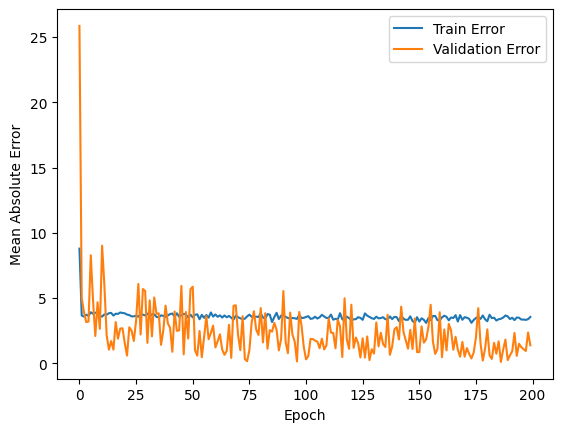

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')

plt.plot(td['epoch'],td['mae'],label='Train Error')
plt.plot(td['epoch'],td['val_mae'],label='Validation Error')

plt.legend()

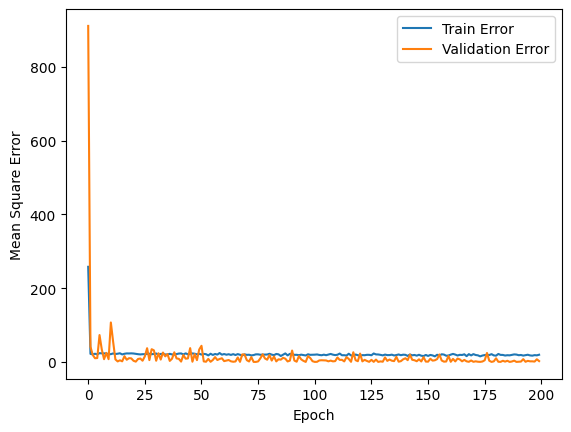

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')

plt.plot(td['epoch'],td['mse'],label='Train Error')
plt.plot(td['epoch'],td['val_mse'],label='Validation Error')

plt.legend()